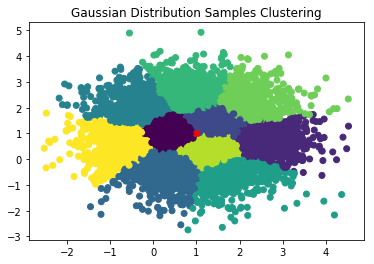

In [92]:
import numpy as np
np.random.seed(12345)

import matplotlib.pyplot as plt
%matplotlib inline
from math import ceil

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

nbSamples = 10000

def getGaussianSimuls(nbSamples,means,stdevs,correl):
    
    covar = correl * stdevs[0] * stdevs[1]
    return np.random.multivariate_normal(np.array(means),np.array([[stdevs[0]**2,covar],[covar,stdevs[1]**2]]),nbSamples)


# Gaussian distribution samples clustering
means = [1.0,1.0]
stdevs = [1.0,1.0]
correl = .0
X = getGaussianSimuls(nbSamples,means,stdevs,correl)

nbClusters = 10
clusteringFraction = 1.

clusteringNbPoints = ceil(clusteringFraction*nbSamples)
kMeans = KMeans(n_clusters=nbClusters).fit(X[:clusteringNbPoints,:])
labels = kMeans.predict(X)

Xaverage = np.average(X,axis=0)

plt.figure()
plt.plot(Xaverage[0], Xaverage[1], 'X', color='red')
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Gaussian Distribution Samples Clustering")
plt.show()


# Clustering on 2 modes
# means2 = 10.0 * np.array(means)
# stdevs2 = 2.0 * np.array(stdevs)
# correl2 = -1.0
# X2 = getGaussianSimuls(nbSamples,means2,stdevs2,correl2)

# mode2Proba = 0.5
# mode1 = (np.random.uniform(size=nbSamples) > mode2Proba).reshape((nbSamples,1))

# Xmodes = mode1 * X + (1.0-mode1) * X2

# nbClusters2 = 5
# kMeans2 = KMeans(n_clusters=nbClusters2).fit(Xmodes[:clusteringNbPoints,:])
# labelsModes = kMeans2.predict(Xmodes)

# plt.figure()
# plt.scatter(Xmodes[:, 0], Xmodes[:, 1], c=labelsModes)
# plt.title("Bi-modal Gaussian Distribution Samples Clustering")
# plt.show()


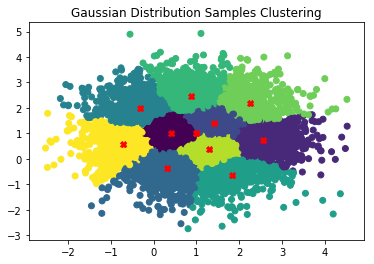

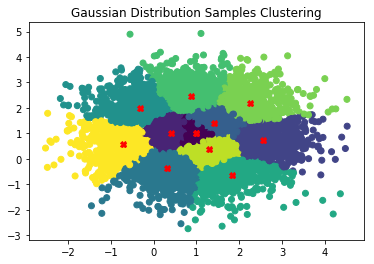

In [93]:
# Smoothing

# Move centroids alpha closer to the average of the ditribution
alpha = -.0
newCentroids = alpha * Xaverage + (1.-alpha) * kMeans.cluster_centers_
newCentroids = np.insert(newCentroids,0,Xaverage,axis=0)

plt.figure()
plt.plot(Xaverage[0], Xaverage[1], 'X', color='red')
plt.plot(newCentroids[:,0], newCentroids[:,1], 'X', color='red')
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Gaussian Distribution Samples Clustering")
plt.show()

# get new clusters
smoothingKMeans = KMeans(n_clusters=nbClusters+1,init=newCentroids,n_init=1).fit(newCentroids)
smoothingLabels = smoothingKMeans.predict(X)

plt.figure()
plt.plot(Xaverage[0], Xaverage[1], 'X', color='red')
plt.plot(newCentroids[:,0], newCentroids[:,1], 'X', color='red')
plt.scatter(X[:, 0], X[:, 1], c=smoothingLabels)
plt.title("Gaussian Distribution Samples Clustering")
plt.show()



In [94]:
from sklearn import metrics
clustersWeights = metrics.pairwise.rbf_kernel(newCentroids,newCentroids[0].reshape((1,-1)),None).reshape((-1))
clustersWeights

array([1.        , 0.84665759, 0.28602816, 0.84888391, 0.30844374,
       0.25655072, 0.18342258, 0.33775817, 0.21652204, 0.79117886,
       0.21155601])

In [95]:
select=np.argsort(clustersWeights)[::-1][:3]
select

array([0, 3, 1], dtype=int64)

In [96]:
np.isin(labels,select)

array([ True,  True, False, ..., False, False, False])

In [97]:
labels[-1]

7